# Assignment2 - Supervised Learning flow

# Part 1 - Student details:
* Please write the First Name and last 4 digits of the i.d. for each student. For example:
<pre>Israel 9812</pre>

In [1]:
# student 1: Adana Abey , 3572
# student 2: Shai Dahari, 0431

## Part 2 - Initial Preparations 
You could add as many code cells as needed

In [2]:
import warnings
warnings.simplefilter("ignore")
%matplotlib inline
# --------------------------------------
# show several outputs in one cell. 
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
# --------------------------------------
# This setup is useful for data  
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap
#import sklearn: preprocessing, Feature selection, Features engineering
from sklearn import datasets
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
# Import necessary libraries for classification models and parameter tuning
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.pipeline import Pipeline

# Loading the trainset and the testset:
1. Display the first 5 rows of each dataset.
2. Displaying statistical information of each dataset.
3. Displaying the information type of each dataset.

In [3]:
def load_dataset(file_name1, file_name2):
    # Load the training dataset
    train_df = pd.read_csv(file_name1)
    
    # Load the test dataset
    test_df = pd.read_csv(file_name2)
    
    return train_df, test_df

In [4]:
# load_dataset(train & test) - using the function above.
# IMPLEMENT & RUN 

file_name1 = 'titanic_train.csv'
file_name2 = 'titanic_test.csv'
titanicTrain_df, titanicTest_df = load_dataset (file_name1, file_name2)

# Train Data Set

**Display the first 5 rows of train dataset**

In [5]:
print(f"The dimensions of the data frame are: rows = {titanicTrain_df.shape[0]}, columns = {titanicTrain_df.shape[1]}")
titanicTrain_df.head()

The dimensions of the data frame are: rows = 712, columns = 8


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,1,0,54.0,1,0,78.2667,1,1
1,2,0,45.0,0,0,13.5000,0,1
2,3,1,20.0,0,0,9.5000,0,0
3,3,1,36.0,0,0,7.8958,0,0
4,3,1,22.0,0,0,8.0500,0,0


**Statistical information of train dataset**

In [6]:
titanicTrain_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000,712.000000
mean,2.294944,0.640449,29.531213,0.528090,0.384831,32.379429,0.372191,0.394663
std,0.841990,0.480206,13.188028,1.055052,0.803085,49.836074,0.649970,0.489122
min,1.000000,0.000000,0.670000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,1.750000,0.000000,22.000000,0.000000,0.000000,7.925000,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,14.500000,0.000000,0.000000
75%,3.000000,1.000000,35.000000,1.000000,0.000000,31.275000,1.000000,1.000000
max,3.000000,1.000000,80.000000,8.000000,6.000000,512.329200,3.000000,1.000000


**Displaying the information & type of train dataset**

In [7]:
titanicTrain_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 712 entries, 0 to 711
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    712 non-null    int64  
 1   Sex       712 non-null    int64  
 2   Age       712 non-null    float64
 3   SibSp     712 non-null    int64  
 4   Parch     712 non-null    int64  
 5   Fare      712 non-null    float64
 6   Embarked  712 non-null    int64  
 7   Survived  712 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 44.6 KB


# Test Data Set

**Display the first 5 rows of test dataset**

In [8]:
print(f"The dimensions of the data frame are: rows = {titanicTest_df.shape[0]}, columns = {titanicTest_df.shape[1]}")
titanicTest_df.head()

The dimensions of the data frame are: rows = 179, columns = 8


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


**Statistical information of test dataset**

In [9]:
titanicTest_df.describe()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
count,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000,179.000000
mean,2.363128,0.675978,30.366983,0.502793,0.368715,31.507239,0.351955,0.340782
std,0.812116,0.469321,12.246691,1.278053,0.819923,49.254330,0.639640,0.475302
min,1.000000,0.000000,0.420000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.000000,0.000000,24.000000,0.000000,0.000000,7.895800,0.000000,0.000000
50%,3.000000,1.000000,29.699118,0.000000,0.000000,12.000000,0.000000,0.000000
75%,3.000000,1.000000,36.000000,1.000000,0.000000,27.825000,1.000000,1.000000
max,3.000000,1.000000,71.000000,8.000000,5.000000,263.000000,3.000000,1.000000


**Displaying the information & type of test dataset**

In [10]:
titanicTest_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 179 entries, 0 to 178
Data columns (total 8 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Pclass    179 non-null    int64  
 1   Sex       179 non-null    int64  
 2   Age       179 non-null    float64
 3   SibSp     179 non-null    int64  
 4   Parch     179 non-null    int64  
 5   Fare      179 non-null    float64
 6   Embarked  179 non-null    int64  
 7   Survived  179 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 11.3 KB


#  Data Cleasning:
**For the train data set**
1. Missing data.
2. Duplications.
3. Outlier detection.

# 1. Missing data
**Fill missing data with average values**

In [11]:
# Cheking for missing data.
missing_data = titanicTrain_df.isnull().sum()
numOfNissing = missing_data.sum()
if missing_data.sum() == 0: # if non is missinng
    print(missing_data)
    print(f"There is {numOfNissing} missing information")
else: # fill missing data with average values
    print(f"There is {numOfNissing} missing information before filling")
    titanicTrain_df.fillna(titanicTrain_df.mean(), inplace=True)
    print(f"There is {numOfNissing} missing information after filling")
    print(missing_data)

Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64
There is 0 missing information


# 2.Duplications
**Removing duplicate rows if any**

In [12]:
# Cheking for duplicate.
duplicates = titanicTrain_df.duplicated()
print("Number of duplicate rows:", duplicates.sum())
# Removing duplicate rows if any
if duplicates.sum() != 0:
    numOfrows_train = titanicTrain_df.shape[0]
    print(f"Number of rows in train data frame: {numOfrows_train}")

    titanicTrain_df.drop_duplicates(keep='first', inplace=True)
    titanicTrain_df = titanicTrain_df.reset_index(drop=True) # Reset indexing
    numOfrows_train = titanicTrain_df.shape[0]

    print(f"Number of rows in train data frame after removing duplicates is: {numOfrows_train}")
else:
    print('There are no duplicated rows')

Number of duplicate rows: 80
Number of rows in train data frame: 712
Number of rows in train data frame after removing duplicates is: 632


# 3. Outlier Detection.  

**Anomaly detection using IQR**

In [13]:
Q1 = titanicTrain_df.quantile(0.25)
Q3 = titanicTrain_df.quantile(0.75)
IQR = Q3 - Q1

outliers = ((titanicTrain_df < (Q1 - 1.5 * IQR)) | (titanicTrain_df > (Q3 + 1.5 * IQR))).sum()
if outliers.sum() != 0: # Cheking for outliers
    print(f"The number of dataced outliers is: {outliers.sum()}")
    print("Here is the outliers info:\n", outliers)
    print("Removal of outliers is needed\n")
    titanicTrain_df = titanicTrain_df[~((titanicTrain_df < (Q1 - 1.5 * IQR)) | (titanicTrain_df > (Q3 + 1.5 * IQR))).any(axis=1)]
    titanicTrain_df = titanicTrain_df.reset_index(drop=True) # Reset indexing
    print("Checking that the anomalys have been removed\n")
    outliers = ((titanicTrain_df < (Q1 - 1.5 * IQR)) | (titanicTrain_df > (Q3 + 1.5 * IQR))).sum()
    print(f"The number of dataced outliers after removal is: {outliers.sum()}")
    print("Here is the outliers info after removal:\n", outliers)
    numOfrows_train = titanicTrain_df.shape[0]
    print(f"Number of rows in train data frame after removing anomalys is: {numOfrows_train}")
else: # There are no anomalys
    print(f"The number of dataced outliers is: {outliers.sum()}")
    print("Here is the outliers info:\n", outliers)
   

The number of dataced outliers is: 150
Here is the outliers info:
 Pclass       0
Sex          0
Age         25
SibSp       34
Parch       12
Fare        78
Embarked     1
Survived     0
dtype: int64
Removal of outliers is needed

Checking that the anomalys have been removed

The number of dataced outliers after removal is: 0
Here is the outliers info after removal:
 Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
Embarked    0
Survived    0
dtype: int64
Number of rows in train data frame after removing anomalys is: 491


We can see that there are no more anomalys

# EDA 
**presenting statistics and visualizations on the data**

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

<AxesSubplot:xlabel='Sex', ylabel='Survived'>

Text(0.5, 1.0, 'Survival Rate by Sex')

<AxesSubplot:>

<AxesSubplot:xlabel='Pclass', ylabel='Survived'>

Text(0.5, 1.0, 'Survival Rate by Pclass')

<AxesSubplot:>

<AxesSubplot:xlabel='Age', ylabel='Count'>

<AxesSubplot:xlabel='Age', ylabel='Count'>

Text(0.5, 1.0, 'Age Distribution by Survival')

<AxesSubplot:>

<AxesSubplot:xlabel='Survived', ylabel='Fare'>

Text(0.5, 1.0, 'Fare Distribution by Survival')

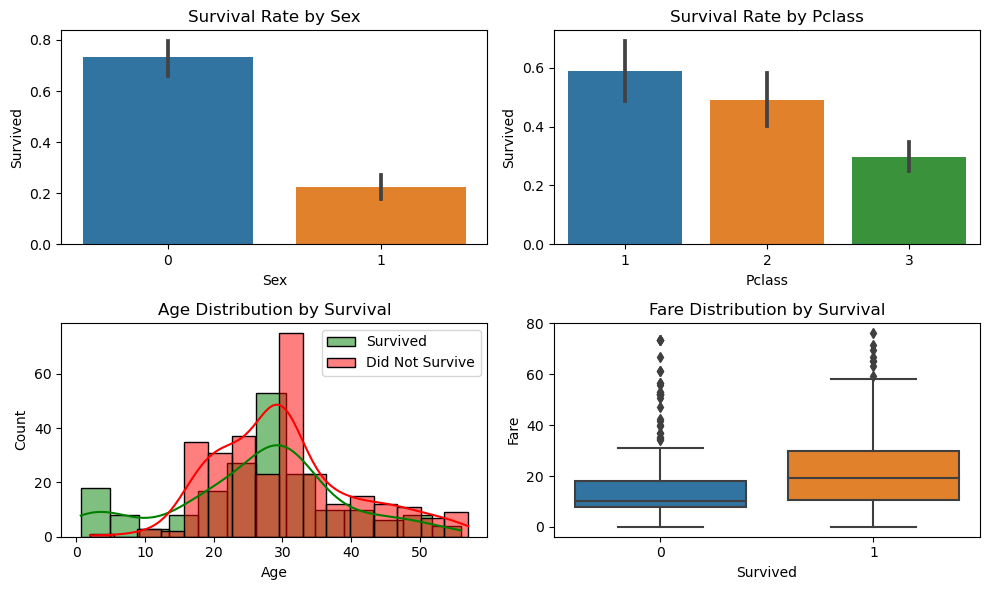

In [14]:
# Survival Rates by Sex, Pclass, Age, and Family Size
plt.figure(figsize=(10, 6))

plt.subplot(2, 2, 1)
sns.barplot(x='Sex', y='Survived', data=titanicTrain_df)
plt.title('Survival Rate by Sex')

plt.subplot(2, 2, 2)
sns.barplot(x='Pclass', y='Survived', data=titanicTrain_df)
plt.title('Survival Rate by Pclass')

plt.subplot(2, 2, 3)
sns.histplot(titanicTrain_df[titanicTrain_df['Survived'] == 1]['Age'], kde=True, color='green', label='Survived')
sns.histplot(titanicTrain_df[titanicTrain_df['Survived'] == 0]['Age'], kde=True, color='red', label='Did Not Survive')
plt.title('Age Distribution by Survival')
plt.legend()

plt.subplot(2, 2, 4)
sns.boxplot(x='Survived', y='Fare', data=titanicTrain_df)
plt.title('Fare Distribution by Survival')

plt.tight_layout()
plt.show()


Text(0.5, 1.0, 'Survival by Age and Pclass')

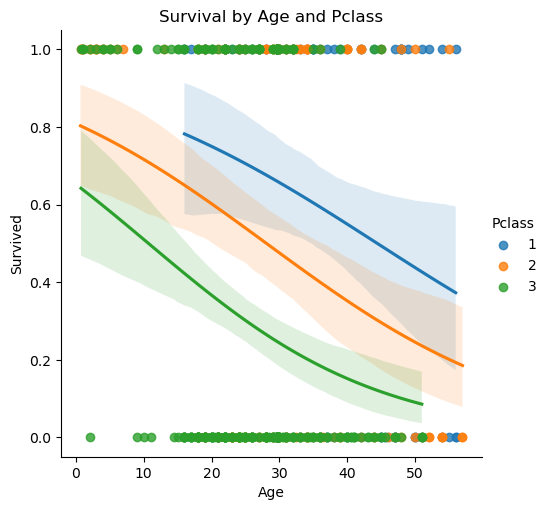

In [15]:
# Advanced Visualization: Survival Curves
sns.lmplot(x='Age', y='Survived', hue='Pclass', data=titanicTrain_df, logistic=True)
plt.title('Survival by Age and Pclass')
plt.show()


# Preprocessing:
**This step will inclue:**
1. Feature Engineering. 
2. Feature Selection.
2. PCA - for dimensional reduction.
**note: Our preprocessing designed for the machine learning to be inclusive and not over-fitting**

# Feature selection 

**Step 1 - Calculate the Correlation Matrix & display Heat map**

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap (Bottom Half Only)')

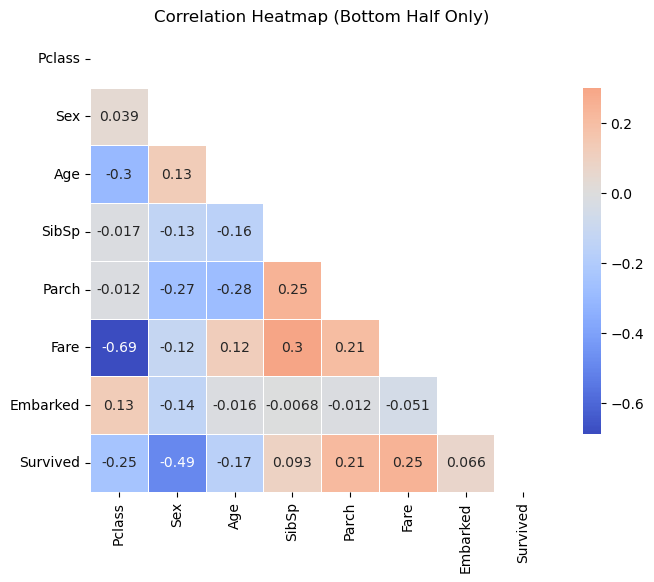

In [16]:
# Compute the correlation matrix
corr_matrix = titanicTrain_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

mask = np.triu(np.ones_like(corr_matrix, dtype=bool))

# Create a heatmap with only the lower triangle shown
sns.heatmap(
    corr_matrix,
    mask=mask,  # Apply the mask to hide the upper triangle
    annot=True,  # Annotate each cell with the correlation value
    cmap='coolwarm',  # Colormap to distinguish positive and negative values
    center=0,  # Center the colormap around 0
    square=True,  # Keep the cells square-shaped
    linewidths=0.5,  # Optional: Add lines between cells for clarity
    cbar_kws={"shrink": 0.75}  # Optional: Adjust color bar size
)

# Display the plot
plt.title('Correlation Heatmap (Bottom Half Only)')
plt.show()


**Step 2 - Extract High and Low Correlation Pairs, each feature to target**

In [17]:
# Calculate correlations of each feature with the target
target_col = 'Survived'
correlations = titanicTrain_df.corr()[target_col].sort_values(ascending=False)

# Display the correlations
print("Correlations with Target Column:")
print(correlations)

# Optionally, filter high positive or negative correlations
high_threshold = 0.25  # Adjust as needed
low_threshold = 0.1

# High correlations (positive or negative)
high_corr = correlations[(correlations > high_threshold) | (correlations < -high_threshold)]
print("\nHigh Correlation Features:")
print(high_corr)

# Low correlations (near zero)
low_corr = correlations[(correlations > -low_threshold) & (correlations < low_threshold)]
print("\nLow Correlation Features:")
print(low_corr)


Correlations with Target Column:
Survived    1.000000
Fare        0.247703
Parch       0.214076
SibSp       0.092558
Embarked    0.065814
Age        -0.165207
Pclass     -0.245912
Sex        -0.493752
Name: Survived, dtype: float64

High Correlation Features:
Survived    1.000000
Sex        -0.493752
Name: Survived, dtype: float64

Low Correlation Features:
SibSp       0.092558
Embarked    0.065814
Name: Survived, dtype: float64


**Displaying the result in an abstruct visual to understand**

<Figure size 1000x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Feature Correlations with Target Variable')

Text(0.5, 0, 'Correlation Coefficient')

Text(0, 0.5, 'Features')

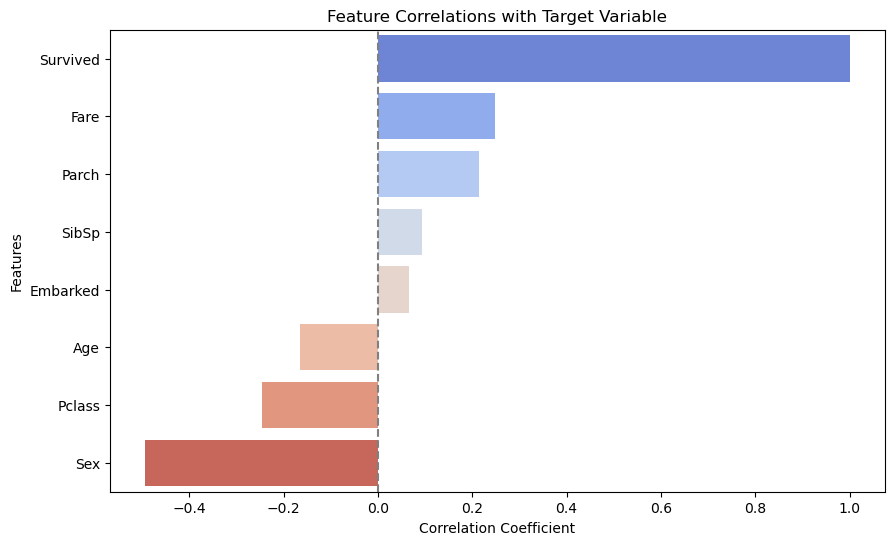

In [18]:
# Bar plot for correlations
plt.figure(figsize=(10, 6))
sns.barplot(x=correlations.values, y=correlations.index, palette='coolwarm')
plt.title('Feature Correlations with Target Variable')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Features')
plt.axvline(0, color='gray', linestyle='--')  # Line at 0 for reference
plt.show()

**We can see that the features SibSp & Embarked
with low linear corrolation to Survived
thus we will drop thos features from our datasets train & test**

**Step 3 - Droping SibSp & Embarked features from our train dataset & test data set**

In [19]:
# Making copy to preseve the the data without changes
FS_train_df = titanicTrain_df.copy().drop(['SibSp','Embarked'],axis=1)
print(f"The dimensions of the Train data frame before Feture Selection are: rows = {titanicTest_df.shape[0]}, columns = {titanicTest_df.shape[1]}")
titanicTrain_df.head()
print(f"Number of columns before Feature Selection is: {titanicTrain_df.shape[1]}")
print(f"Number of Features before Feature Selection is: {titanicTrain_df.shape[1]-1}")
print("\n")
print(f"The dimensions of the Train data frame after Feture Selection are: rows = {FS_train_df.shape[0]}, columns = {FS_train_df.shape[1]}")
FS_train_df.head()
print(f"Number of columns after Feature Selection is: {FS_train_df.shape[1]}")
print(f"Number of Features after Feature Selection is: {FS_train_df.shape[1]-1}")


The dimensions of the Train data frame before Feture Selection are: rows = 179, columns = 8


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,2,0,45.000000,0,0,13.5000,0,1
1,3,1,20.000000,0,0,9.5000,0,0
2,3,1,36.000000,0,0,7.8958,0,0
3,3,1,22.000000,0,0,8.0500,0,0
4,3,1,29.699118,0,0,7.2500,0,0


Number of columns before Feature Selection is: 8
Number of Features before Feature Selection is: 7


The dimensions of the Train data frame after Feture Selection are: rows = 491, columns = 6


,Pclass,Sex,Age,Parch,Fare,Survived
0,2,0,45.000000,0,13.5000,1
1,3,1,20.000000,0,9.5000,0
2,3,1,36.000000,0,7.8958,0
3,3,1,22.000000,0,8.0500,0
4,3,1,29.699118,0,7.2500,0


Number of columns after Feature Selection is: 6
Number of Features after Feature Selection is: 5


**Droping SibSp & Embarked features from our test dataset**

In [20]:
# Making copy to preseve the the data without changes
FS_test_df = titanicTest_df.copy().drop(['SibSp','Embarked'],axis=1)
print(f"The dimensions of the data frame before Feture Selection are: rows = {titanicTest_df.shape[0]}, columns = {titanicTest_df.shape[1]}")
titanicTest_df.head()
print(f"Number of columns before Feature Selection is: {titanicTest_df.shape[1]}")
print(f"Number of Features before Feature Selection is: {titanicTest_df.shape[1]-1}")
print("\n")
print(f"The dimensions of the data frame after Feture Selection are: rows = {FS_test_df.shape[0]}, columns = {FS_test_df.shape[1]}")
FS_test_df.head()
print(f"Number of columns after Feature Selection is: {FS_test_df.shape[1]}")
print(f"Number of Features after Feature Selection is: {FS_test_df.shape[1]-1}")



The dimensions of the data frame before Feture Selection are: rows = 179, columns = 8


,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Survived
0,3,1,35.000000,0,0,7.0500,0,0
1,3,1,30.000000,0,0,7.2500,0,0
2,3,1,29.699118,0,0,14.5000,0,0
3,3,0,21.000000,0,0,7.7500,2,0
4,3,1,32.000000,0,0,56.4958,0,1


Number of columns before Feature Selection is: 8
Number of Features before Feature Selection is: 7


The dimensions of the data frame after Feture Selection are: rows = 179, columns = 6


,Pclass,Sex,Age,Parch,Fare,Survived
0,3,1,35.000000,0,7.0500,0
1,3,1,30.000000,0,7.2500,0
2,3,1,29.699118,0,14.5000,0
3,3,0,21.000000,0,7.7500,0
4,3,1,32.000000,0,56.4958,1


Number of columns after Feature Selection is: 6
Number of Features after Feature Selection is: 5


# Feature Engineering
**Data Description of veriable type:**
1. Survived --> Binary --> Nominal(Categorial with no orde): (0 = No, 1 = Yes);
2. Pclass (Ticket class) --> Ordinal(Categorial with orde): (1 = High, 2 = Middle, 3 = Low);
3. Sex --> Binary --> Nominal(Categorial with no orde): (0 = male, 1 = female);
4. Parch (num of parents / children aboard the Titanic) --> Continuous number;
5. Fare (Ticket cost) --> Continuous number;
6. Age (Age of passenger) --> Continuous number;

# PCA - for dimensional reduction

**Cheking the correlation netween each features**

In [21]:
features_df = FS_train_df.copy().drop('Survived', axis=1)
features_df.head()
features_df.shape

,Pclass,Sex,Age,Parch,Fare
0,2,0,45.000000,0,13.5000
1,3,1,20.000000,0,9.5000
2,3,1,36.000000,0,7.8958
3,3,1,22.000000,0,8.0500
4,3,1,29.699118,0,7.2500


(491, 5)

<Figure size 800x600 with 0 Axes>

<AxesSubplot:>

Text(0.5, 1.0, 'Correlation Heatmap (Bottom Half Only)')

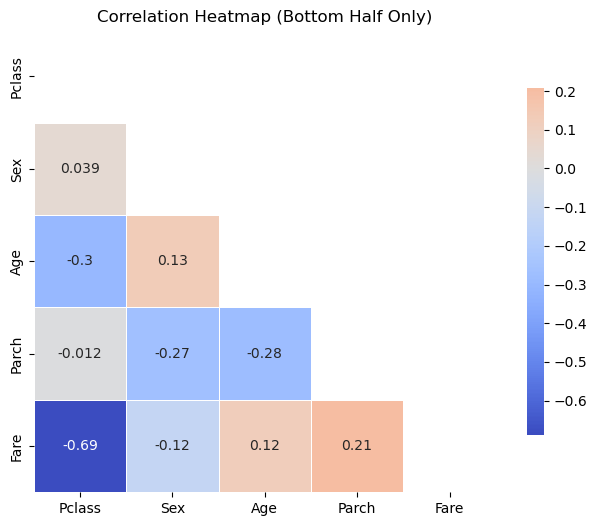


High Correlation Pairs:
  Feature 1 Feature 2  Correlation
1       Age    Pclass    -0.299430
4     Parch       Sex    -0.265989
5     Parch       Age    -0.281852
6      Fare    Pclass    -0.687646

Low Correlation Pairs:
  Feature 1 Feature 2  Correlation
0       Sex    Pclass     0.039095
3     Parch    Pclass    -0.011832


<Figure size 600x600 with 0 Axes>

<AxesSubplot:xlabel='Correlation'>

Text(0.5, 1.0, 'High and Low Correlation Pairs Between Features')

Text(0.5, 0, 'Correlation Coefficient')

Text(0, 0.5, 'Feature Pairs')

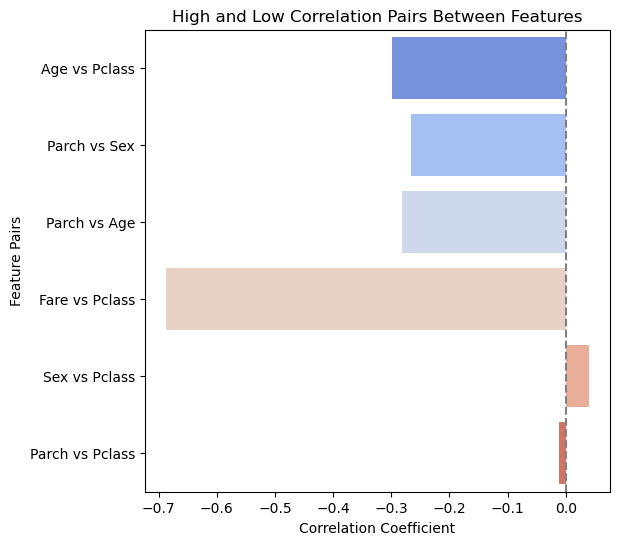

In [22]:
# Calculate the Correlation Matrix & Display Heatmap
corrFeature_matrix = features_df.corr()

# Set up the matplotlib figure
plt.figure(figsize=(8, 6))

# Mask for the upper triangle
mask = np.triu(np.ones_like(corrFeature_matrix, dtype=bool))

# Create a heatmap with only the lower triangle shown
sns.heatmap(
    corrFeature_matrix,
    mask=mask,  # Apply the mask to hide the upper triangle
    annot=True,  # Annotate each cell with the correlation value
    cmap='coolwarm',  # Colormap to distinguish positive and negative values
    center=0,  # Center the colormap around 0
    square=True,  # Keep the cells square-shaped
    linewidths=0.5,  # Optional: Add lines between cells for clarity
    cbar_kws={"shrink": 0.75}  # Optional: Adjust color bar size
)

# Display the plot
plt.title('Correlation Heatmap (Bottom Half Only)')
plt.show()

# Extract the lower triangle of the correlation matrix
corr_pairs = corrFeature_matrix.where(np.tril(np.ones(corrFeature_matrix.shape), k=-1).astype(bool))

# Flatten and drop NaN values to get pairs of features with their correlation values
corr_pairs_flat = corr_pairs.stack().reset_index()
corr_pairs_flat.columns = ['Feature 1', 'Feature 2', 'Correlation']

# Define thresholds for high and low correlations
high_threshold = 0.25  # Adjust as needed
low_threshold = 0.1

# Extract high correlations (positive or negative)
high_corr_pairs = corr_pairs_flat[
    (corr_pairs_flat['Correlation'] > high_threshold) | 
    (corr_pairs_flat['Correlation'] < -high_threshold)
]

# Extract low correlations (near zero)
low_corr_pairs = corr_pairs_flat[
    (corr_pairs_flat['Correlation'] > -low_threshold) & 
    (corr_pairs_flat['Correlation'] < low_threshold)
]

# Display high and low correlation pairs
print("\nHigh Correlation Pairs:")
print(high_corr_pairs)

print("\nLow Correlation Pairs:")
print(low_corr_pairs)

# Combine high and low correlation pairs into one DataFrame for visualization
combined_corr_pairs = pd.concat([high_corr_pairs, low_corr_pairs])

# Create bar plot for high and low correlation pairs
plt.figure(figsize=(6, 6))
sns.barplot(
    x=combined_corr_pairs['Correlation'], 
    y=combined_corr_pairs['Feature 1'] + " vs " + combined_corr_pairs['Feature 2'], 
    palette='coolwarm'
)
plt.title('High and Low Correlation Pairs Between Features')
plt.xlabel('Correlation Coefficient')
plt.ylabel('Feature Pairs')
plt.axvline(0, color='gray', linestyle='--')  # Line at 0 for reference
plt.show()


**Extract High and Low Correlation Pairs & unite the features**

In [23]:
# Extract the relevant features from your DataFrame
data = FS_train_df.copy()[['Fare', 'Pclass']]  # Extract 'Fare' and 'Pclass' columns from titanicTrain_df

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Scaling the selected features

# Apply PCA to reduce the dimensions and create the new socioEconomic feature
pca = PCA(n_components=1)  # We want to combine into one principal component
socio_economic_component = pca.fit_transform(data_scaled)

# Add the new feature back to the original DataFrame
FS_train_df['socioEconomic'] = socio_economic_component

# Drop the original 'Fare' and 'Pclass' features
FS_FE_train_df = FS_train_df.copy().drop(['Fare', 'Pclass'], axis=1)

# Display the first few rows of the updated DataFrame to verify the new feature
print(FS_train_df.head())
print(FS_FE_train_df.head())
FS_FE_train_df['socioEconomic'].describe()

   Pclass  Sex        Age  Parch     Fare  Survived  socioEconomic
0       2    0  45.000000      0  13.5000         1       0.102109
1       3    1  20.000000      0   9.5000         0      -0.993607
2       3    1  36.000000      0   7.8958         0      -1.066025
3       3    1  22.000000      0   8.0500         0      -1.059064
4       3    1  29.699118      0   7.2500         0      -1.095177
   Sex        Age  Parch  Survived  socioEconomic
0    0  45.000000      0         1       0.102109
1    1  20.000000      0         0      -0.993607
2    1  36.000000      0         0      -1.066025
3    1  22.000000      0         0      -1.059064
4    1  29.699118      0         0      -1.095177


count    4.910000e+02
mean     9.835988e-17
std      1.300419e+00
min     -1.422459e+00
25%     -1.065365e+00
50%     -6.369835e-01
75%      6.663868e-01
max      3.851815e+00
Name: socioEconomic, dtype: float64

In [24]:
# Extract the relevant features from your DataFrame
data = FS_test_df.copy()[['Fare', 'Pclass']]  # Extract 'Fare' and 'Pclass' columns from titanicTrain_df

# Standardize the features
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)  # Scaling the selected features

# Apply PCA to reduce the dimensions and create the new socioEconomic feature
pca = PCA(n_components=1)  # We want to combine into one principal component
socio_economic_component = pca.fit_transform(data_scaled)

# Add the new feature back to the original DataFrame
FS_test_df['socioEconomic'] = socio_economic_component

# Drop the original 'Fare' and 'Pclass' features
FS_FE_test_df = FS_test_df.copy().drop(['Fare', 'Pclass'], axis=1)

# Display the first few rows of the updated DataFrame to verify the new feature
print(FS_test_df.head())
print(FS_FE_test_df.head())
FS_FE_test_df['socioEconomic'].describe()

   Pclass  Sex        Age  Parch     Fare  Survived  socioEconomic
0       3    1  35.000000      0   7.0500         0      -0.908176
1       3    1  30.000000      0   7.2500         0      -0.905297
2       3    1  29.699118      0  14.5000         0      -0.800923
3       3    0  21.000000      0   7.7500         0      -0.898099
4       3    1  32.000000      0  56.4958         1      -0.196330
   Sex        Age  Parch  Survived  socioEconomic
0    1  35.000000      0         0      -0.908176
1    1  30.000000      0         0      -0.905297
2    1  29.699118      0         0      -0.800923
3    0  21.000000      0         0      -0.898099
4    1  32.000000      0         1      -0.196330


count    1.790000e+02
mean    -4.093560e-17
std      1.258207e+00
min     -1.009672e+00
25%     -8.959999e-01
50%     -6.619962e-01
75%      2.413760e-01
max      4.522888e+00
Name: socioEconomic, dtype: float64

# Conducting experiments:
**Selecting the best permutation of:**
1. Feature Engineering .
2. Hyper Parameter.
3. Machine Learning Model. 
**Using the 5-fold-cross-validation method with Grid Search** 

In [25]:
# Define features and target variable for training and testing sets
# Ensure 'Survived' is excluded from X_train and X_test
X_train = FS_FE_train_df.drop(columns=['Survived'])  # Features for the training set
y_train = FS_FE_train_df['Survived']                # Target variable for the training set

X_test = FS_FE_test_df.drop(columns=['Survived'])   # Features for the test set
y_test = FS_FE_test_df['Survived']                  # Target variable for the test set

# Split the original training set into new train and validation sets
X_train_new, X_val, y_train_new, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=42)

In [26]:
# Define parameter grids for KNN , Naive Bayes and Decision Tree models
param_grid_KNN = {
    'n_neighbors': [3, 5, 7, 9],
    'metric': ['euclidean', 'manhattan', 'chebyshev']
}

param_grid_DT = {
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 10, 20, 30, 40, 50],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}


param_grid_NB = {
    'var_smoothing': [1e-9, 1e-8, 1e-7, 1e-6, 1e-5]
}

# List of models to evaluate
models = [
    ('KNN', KNeighborsClassifier(), param_grid_KNN),
    ('Naive Bayes', GaussianNB(), param_grid_NB),
    ('Decision_Tree', DecisionTreeClassifier(), param_grid_DT)
]

# Function to run grid search and evaluation
def run_grid_search_and_evaluation(X_train, y_train, model, param_grid):
    # Perform grid search with cross-validation
    grid_search = GridSearchCV(estimator=model, param_grid=param_grid, cv=5, scoring='accuracy')
    grid_search.fit(X_train, y_train)
    
    # Get the best model from the grid search
    best_model = grid_search.best_estimator_
    best_model.fit(X_train, y_train)
    
    # Make predictions on the test data
    y_pred = best_model.predict(X_test)
    
    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred)
    recall = recall_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred)
    
    # Return the results including the actual best model object
    return {
        'Model': best_model,  # Storing the actual model object, not just the name
        'Recall': recall,
        'F1 Score': f1,
        'Best Parameters': grid_search.best_params_,
        'Best CV Accuracy': grid_search.best_score_,
        'Accuracy': accuracy,
        'Precision': precision
    }

# List to store results
results = []

# Run evaluation for each model
for name, model, param_grid in models:
    result = run_grid_search_and_evaluation(X_train, y_train, model, param_grid)
    results.append(result)

# Create a DataFrame to display results
results_df = pd.DataFrame(results)
print(results_df)

                                               Model    Recall  F1 Score  \
0  KNeighborsClassifier(metric='manhattan', n_nei...  0.491803  0.555556   
1                                       GaussianNB()  0.754098  0.691729   
2  DecisionTreeClassifier(criterion='entropy', ma...  0.573770  0.619469   

                                     Best Parameters  Best CV Accuracy  \
0          {'metric': 'manhattan', 'n_neighbors': 3}          0.747413   
1                           {'var_smoothing': 1e-09}          0.753474   
2  {'criterion': 'entropy', 'max_depth': 10, 'min...          0.753597   

   Accuracy  Precision  
0  0.731844   0.638298  
1  0.770950   0.638889  
2  0.759777   0.673077  


## Part 4 - Training 
Use the best combination of feature engineering, model (algorithm and hyperparameters) from the experiment part (part 3)

In [27]:
# Extract the best model based on a specific metric (e.g., highest accuracy)
best_result = max(results, key=lambda x: x['Accuracy'])  # Modify the key if needed
best_model = best_result['Model']  # Extract the best model object
print(f"Best Model: {type(best_model).__name__}")  # Print the class of the best model
print(f"Best Parameters: {best_result['Best Parameters']}")

# Step 4: Create a pipeline with the best model
pipeline = Pipeline([
    ('scaler', StandardScaler()),  # Add scaling or other preprocessing steps as needed
    ('best_model', best_model)     # Insert the best model instance
])

# Step 5: Retrain the best model using the pipeline on the full training data
pipeline.fit( X_val, y_val)




Best Model: GaussianNB
Best Parameters: {'var_smoothing': 1e-09}


Pipeline(steps=[('scaler', StandardScaler()), ('best_model', GaussianNB())])

## Part 5 - Apply on test and show model performance estimation

In [28]:
# Step 6: Predict on the test data
y_test_pred = pipeline.predict(X_test)

# Evaluate the retrained best model
final_accuracy = accuracy_score(y_test, y_test_pred)
final_precision = precision_score(y_test, y_test_pred, average='binary')  # Adjust based on your task type
final_recall = recall_score(y_test, y_test_pred, average='binary')
final_f1 = f1_score(y_test, y_test_pred, average='binary')

# Display final evaluation metrics
print(f"Final Accuracy: {final_accuracy}")
print(f"Final Precision: {final_precision}")
print(f"Final Recall: {final_recall}")
print(f"Final F1 Score: {final_f1}")

Final Accuracy: 0.7821229050279329
Final Precision: 0.6571428571428571
Final Recall: 0.7540983606557377
Final F1 Score: 0.7022900763358779


In [29]:
from sklearn.metrics import classification_report

# Evaluate the best model's performance on the training data
y_train_pred = pipeline.predict(X_train)

# Calculate training metrics
train_accuracy = accuracy_score(y_train, y_train_pred)
train_precision = precision_score(y_train, y_train_pred, average='binary')  # Adjust average based on task type
train_recall = recall_score(y_train, y_train_pred, average='binary')
train_f1 = f1_score(y_train, y_train_pred, average='binary')

# Print training evaluation metrics
print(f"Training Accuracy: {train_accuracy}")
print(f"Training Precision: {train_precision}")
print(f"Training Recall: {train_recall}")
print(f"Training F1 Score: {train_f1}")
print("\n")

# Evaluate the model's performance on the test data (already calculated previously)
print(f"Test Accuracy: {final_accuracy}")
print(f"Test Precision: {final_precision}")
print(f"Test Recall: {final_recall}")
print(f"Test F1 Score: {final_f1}")

# Optional: Display a detailed classification report for both training and test data
print("\nClassification Report on Training Data:")
print(classification_report(y_train, y_train_pred))

print("\nClassification Report on Test Data:")
print(classification_report(y_test, y_test_pred))

# Check for overfitting by comparing the scores
performance_gap = train_accuracy - final_accuracy
print(f"\nPerformance Gap (Training - Test): {performance_gap:.2f}")

# Interpretation of performance gap
if performance_gap > 0.1:  # Threshold can be adjusted based on context; 0.1 is an example
    print("Warning: The model might be overfitting. The performance gap is significant.")
else:
    print("The model's performance is consistent; overfitting is unlikely.")
# Evaluate the best model's performance on the training data
y_train_pred = pipeline.predict(X_train)

Training Accuracy: 0.7678207739307535
Training Precision: 0.7098445595854922
Training Recall: 0.7025641025641025
Training F1 Score: 0.7061855670103092


Test Accuracy: 0.7821229050279329
Test Precision: 0.6571428571428571
Test Recall: 0.7540983606557377
Test F1 Score: 0.7022900763358779

Classification Report on Training Data:
              precision    recall  f1-score   support

           0       0.81      0.81      0.81       296
           1       0.71      0.70      0.71       195

    accuracy                           0.77       491
   macro avg       0.76      0.76      0.76       491
weighted avg       0.77      0.77      0.77       491


Classification Report on Test Data:
              precision    recall  f1-score   support

           0       0.86      0.80      0.83       118
           1       0.66      0.75      0.70        61

    accuracy                           0.78       179
   macro avg       0.76      0.78      0.77       179
weighted avg       0.79      0.78  